In [ ]:
import pandas as pd
 
df = pd.read_csv('../data/accidents_parsed.csv', sep=';')
df.head()

,accident_date,victim_transport_mode,victim_category,victim_age,victim_sex,environment,address,longitude,latitude,accident_ID,...,district_code,arrondgeo,intersection_type,lighting_condition,weather_condition,road_surface,first_vehicle,max_speed,first_vehicle_driver_sex,first_vehicle_driver_age
0,2017-04-03,Piéton,Piéton,62,F,En-Agg,BOULEVARD BEAUMARCHAIS,2.36867,48.855,837613,...,75104,"{""coordinates"": [[[[2.369123881, 48.853166231]...",Hors intersection,Plein jour,Normale,Non renseigné,Cyclomoteur <=50 cm3,NaN,M,26.0
1,2017-08-28,2 Roues Motorisées,Conducteur,30,M,En-Agg,RUE MARBEUF,2.3013,48.8667,837073,...,75108,"{""coordinates"": [[[[2.301737288, 48.863496077]...",En Y,Plein jour,Normale,Normale,Scooter > 125 cm3,NaN,M,30.0
2,2017-11-06,2 Roues Motorisées,Conducteur,37,M,En-Agg,RUE LA CONDAMINE,2.32163,48.8858,840008,...,75117,"{""coordinates"": [[[[2.303774362, 48.894153779]...",En X,Plein jour,Normale,Normale,Véhicule de tourisme (VT),NaN,M,45.0
3,2017-09-29,Vélo,Conducteur,51,M,En-Agg,BOULEVARD DE L HOPITAL,2.35941,48.8368,838501,...,75113,"{""coordinates"": [[[[2.366087726, 48.844967843]...",Hors intersection,Plein jour,Normale,Normale,Véhicule de tourisme (VT),NaN,M,53.0
4,2017-12-21,2 Roues Motorisées,Conducteur,50,M,En-Agg,AVENUE DES MINIMES * SAINT MANDE/VINCENN,2.42821,48.8415,838218,...,75112,"{""coordinates"": [[[[2.467319402, 48.839099389]...",Hors intersection,Plein jour,Pluie légère,Mouillée,Scooter > 125 cm3,NaN,M,50.0


In [16]:
# Count accidents by district_code
district_counts = df['district_code'].value_counts().reset_index()
district_counts.columns = ['district_code', 'accident_count']

# Get top 3 districts
top3_districts = district_counts.head(3)
print(top3_districts)


   district_code  accident_count
0          75116            4280
1          75112            3494
2          75117            3078


In [17]:
for dist in top3_districts['district_code']:
    subset = df[df['district_code'] == dist]
    street_counts = (
        subset.groupby('address')['accident_date']
              .count()
              .sort_values(ascending=False)
              .reset_index(name='accident_count')
    )
    top3_streets = street_counts.head(3)
    
    # Calculate percentage of accidents for each street
    total_in_dist = street_counts['accident_count'].sum()
    top3_streets['pct_of_district'] = (
        top3_streets['accident_count'] / total_in_dist * 100
    )
    
    print(f"\nDistrict: {dist}")
    print(top3_streets)



District: 75116
                     address  accident_count  pct_of_district
0         ALLEE DE LONGCHAMP             142         3.317757
1  BD PERIPHERIQUE INTERIEUR             140         3.271028
2  BD PERIPHERIQUE EXTERIEUR             126         2.943925

District: 75112
            address  accident_count  pct_of_district
0  AVENUE DAUMESNIL             231         6.611334
1                A4             168         4.808243
2     QUAI DE BERCY             164         4.693761

District: 75117
                     address  accident_count  pct_of_district
0  BD PERIPHERIQUE INTERIEUR             130         4.223522
1         AVENUE DE VILLIERS             121         3.931124
2           AVENUE DE CLICHY             116         3.768681


/var/folders/wf/1kqrl69s07v9gqlbvq7zyxpc0000gn/T/ipykernel_64054/3945132888.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wf/1kqrl69s07v9gqlbvq7zyxpc0000gn/T/ipykernel_64054/3945132888.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wf/1kqrl69s07v9gqlbvq7zyxpc0000gn/T/ipykernel_64054/3945132888.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

<Axes: title={'center': 'Accidents by Month'}, xlabel='month'>

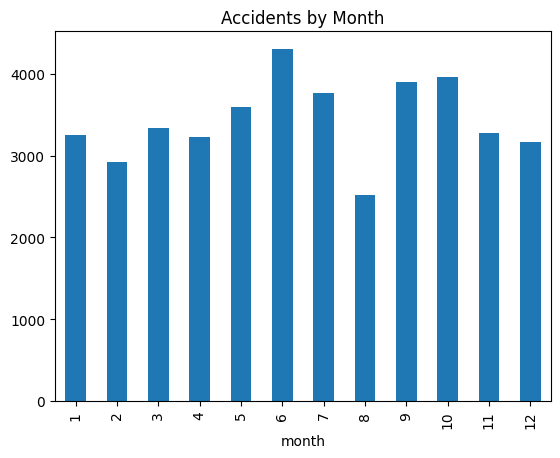

In [18]:
# Convert 'accident_date' if not already converted
df['accident_date'] = pd.to_datetime(df['accident_date'])

# Group by month
df['month'] = df['accident_date'].dt.month
accidents_by_month = df.groupby('month')['accident_date'].count()

accidents_by_month.plot(kind='bar', title='Accidents by Month')


In [19]:
weather_counts = df['weather_condition'].value_counts()
road_surface_counts = df['road_surface'].value_counts()

print("Weather Condition Counts:\n", weather_counts)
print("\nRoad Surface Counts:\n", road_surface_counts)


Weather Condition Counts:
 weather_condition
Normale                29941
Pluie légère            4546
Temps couvert           1699
Pluie forte              658
Temps éblouissant        190
Neige - grèle             89
Autre                     57
Vent fort - tempête       46
Brouillard - fumée        26
Name: count, dtype: int64

Road Surface Counts:
 road_surface
Normale               29369
Mouillée               7008
Non renseigné           619
Corps gras - huile       75
Flaques                  58
Autre                    51
Enneigée                 40
Verglacée                27
Inondée                   5
Name: count, dtype: int64


In [20]:
vehicle_counts = df['first_vehicle'].value_counts()
mode_counts = df['victim_transport_mode'].value_counts()

print("Vehicles Involved (from summary):\n", vehicle_counts)
print("\nVictim Transport Modes:\n", mode_counts)


Vehicles Involved (from summary):
 first_vehicle
Véhicule de tourisme (VT)                                 15363
Bicyclette                                                 3635
Moto ou sidecar > 125 cm3                                  3216
VU seul 1,5T < PTAC <=3,5T                                 2911
Scooter <= 50 cm3                                          2780
Scooter  > 50 <= 125 cm3                                   1975
Cyclomoteur <=50 cm3                                       1105
Scooter > 125 cm3                                          1035
EDP-m                                                       909
Moto ou sidecar  > 50 <= 125 cm3                            850
3 RM > 125 cm3                                              613
Autobus                                                     513
Vélo par assistance électrique                              456
Moto ou sidecar > 50 <= 125 cm3                             424
Scooter > 50 <= 125 cm3                                